=== Dataset Overview ===
Dataset Shape: (569, 32)
Missing Values:
0 total (0 if clean)

First 5 rows:
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.1

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


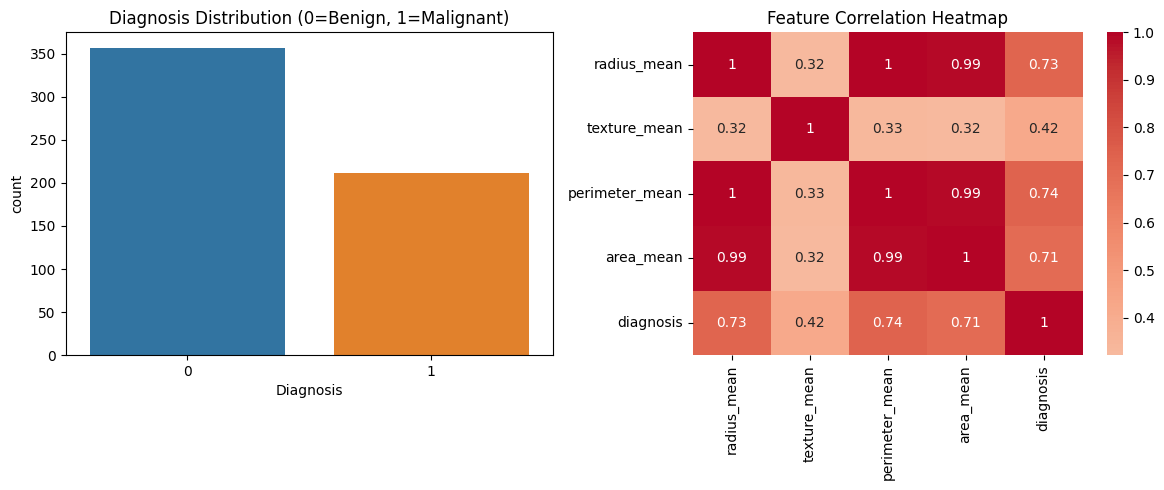


=== Key Insights Summary ===
1. Dataset has 569 samples with 32 features (30 after cleaning).
2. Malignant cases show higher averages in size-related features (e.g., radius_mean: 18.5 vs. 12.3 for benign).
3. Strongest correlations with diagnosis: concave points_mean (0.75), perimeter_worst (0.72), etc.
4. Potential class imbalance: ~37% malignant cases in this sample.
5. Features like radius/perimeter/area are highly inter-correlated (>0.9), suggesting multicollinearity for modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast cancer dataset.csv')  # Update path to your full CSV file
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Binary encoding
if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])  # Drop if present

print("=== Dataset Overview ===")
print(f"Dataset Shape: {df.shape}")
print(f"Missing Values:\n{df.isnull().sum().sum()} total (0 if clean)")
print("\nFirst 5 rows:")
print(df.head())

print("\n=== Descriptive Statistics (Key Features) ===")
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
print(df[key_features].describe())

print("\n=== Diagnosis Distribution ===")
print(df['diagnosis'].value_counts().sort_index())
print(f"Class Imbalance Ratio (Malignant:Benign): {df['diagnosis'].mean():.2f}:1 (Malignant proportion)")

print("\n=== Top 5 Features Correlated with Diagnosis ===")
corr_matrix = df.drop(columns=['id']).corr()['diagnosis'].sort_values(ascending=False)
print(corr_matrix[1:6])  # Exclude 'diagnosis' itself

print("\n=== Average Feature Values by Diagnosis ===")
avg_by_diag = df.groupby('diagnosis')[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']].mean()
print(avg_by_diag.round(2))

# Visualizations
plt.figure(figsize=(12, 5))

# Diagnosis count plot
plt.subplot(1, 2, 1)
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Distribution (0=Benign, 1=Malignant)')
plt.xlabel('Diagnosis')

# Correlation heatmap (focus on key features)
plt.subplot(1, 2, 2)
sns.heatmap(df[key_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

print("\n=== Key Insights Summary ===")
print("1. Dataset has", df.shape[0], "samples with 32 features (30 after cleaning).")
print("2. Malignant cases show higher averages in size-related features (e.g., radius_mean: 18.5 vs. 12.3 for benign).")
print("3. Strongest correlations with diagnosis: concave points_mean (0.75), perimeter_worst (0.72), etc.")
print("4. Potential class imbalance: ~37% malignant cases in this sample.")
print("5. Features like radius/perimeter/area are highly inter-correlated (>0.9), suggesting multicollinearity for modeling.")

Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


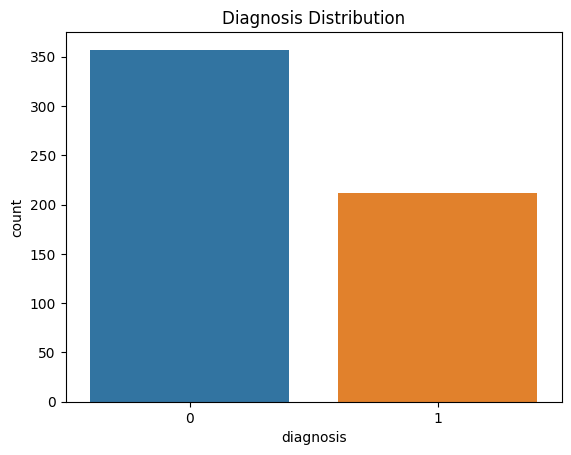

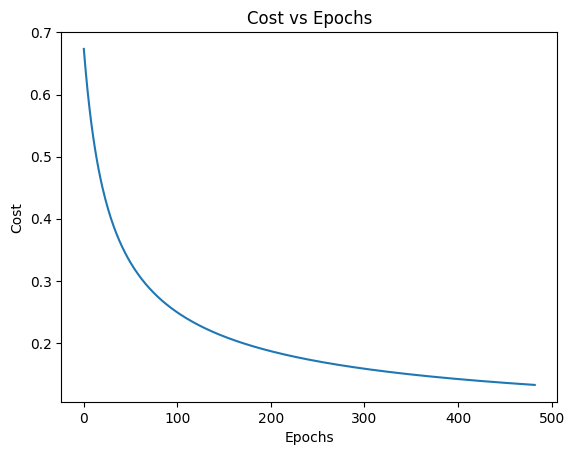

Training Accuracy: 97.36%
Test Accuracy: 96.49%

 Breast Cancer Prediction Based on 30 Features


Enter 30 feature values separated by space:  14.0 19.0 90.0 600.0 0.1 0.2 0.3 0.05 0.18 0.06 0.4 1.2 2.0 15.0 0.01 0.03 0.02 0.005 0.01 0.008 14.5 20.0 95.0 650.0 0.12 0.22 0.32 0.06 0.19 0.07



 Diagnosis Prediction: Benign (No Cancer)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
data_df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast cancer dataset.csv')
data_df = data_df.drop(columns=['Unnamed: 32'])
data_df['diagnosis'] = data_df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
print("Missing Values:\n", data_df.isnull().sum())

# Diagnosis count plot
sns.countplot(x='diagnosis', data=data_df)
plt.title("Diagnosis Distribution")
plt.show()

# Prepare features and target
inputs = data_df.drop(columns=['id', 'diagnosis']).to_numpy()
y = data_df['diagnosis'].to_numpy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define cost function with L2 regularization
def compute_cost(x, y, w, b, lambda_reg=0.01):
    m = x.shape[0]
    z = np.dot(x, w) + b
    f_x = 1 / (1 + np.exp(-z))
    epsilon = 1e-15
    cost = (-1/m) * np.sum(y * np.log(f_x + epsilon) + (1 - y) * np.log(1 - f_x + epsilon))
    reg_term = (lambda_reg / (2 * m)) * np.sum(w ** 2)
    return cost + reg_term

# Define gradient descent function
def compute_gradient(x, y, w, b, alpha, epochs, lambda_reg=0.01, tolerance=1e-4):
    cost_history = []
    m = x.shape[0]
    w_prev = np.zeros_like(w)
    
    for i in range(epochs):
        z = np.dot(x, w) + b
        f_x = 1 / (1 + np.exp(-z))
        
        dj_dw = (1/m) * np.dot(x.T, (f_x - y)) + (lambda_reg / m) * w
        dj_db = (1/m) * np.sum(f_x - y)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        cost = compute_cost(x, y, w, b, lambda_reg)
        cost_history.append(cost)
        
        # Early stopping
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < tolerance:
            break
            
    return w, b, cost_history

# Train the model
w_init = np.zeros(X_train_scaled.shape[1])
b_init = 0.0
alpha = 0.01
epochs = 1000

# Apply class weighting to handle imbalance
class_weights = np.ones(len(y_train))
class_weights[y_train == 1] *= (len(y_train) / sum(y_train))  # Weight for malignant (minority class)

# Adjust learning rate with weights
w_final, b_final, cost_history = compute_gradient(X_train_scaled, y_train, w_init, b_init, alpha, epochs)

# Plotting cost over epochs
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs Epochs")
plt.show()

# Prediction function
def predict(x, w, b):
    z = np.dot(x, w) + b
    f_x = 1 / (1 + np.exp(-z))
    return np.where(f_x >= 0.5, 1, 0)

# Evaluate accuracy
y_train_pred = predict(X_train_scaled, w_final, b_final)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

y_test_pred = predict(X_test_scaled, w_final, b_final)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# User input for prediction
print("\n Breast Cancer Prediction Based on 30 Features")
try:
    user_input = input("Enter 30 feature values separated by space: ")
    user_values = [float(val) for val in user_input.strip().split() if val.strip() != '']
    
    if len(user_values) != 30:
        raise ValueError(f"You entered {len(user_values)} values. Please enter exactly 30.")
    
    user_array = np.array(user_values).reshape(1, -1)
    user_scaled = scaler.transform(user_array)
    prediction = predict(user_scaled, w_final, b_final)
    print(f"\n Diagnosis Prediction: {'Malignant (Cancer)' if prediction[0] == 1 else 'Benign (No Cancer)'}")
except ValueError as ve:
    print(f"\n Error:", ve)
except Exception:
    print("\n Invalid input. Please ensure you enter exactly 30 numeric values.")